# Класификационни и регресионни дървета

In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Класификационни дървета (decision trees)

Характеристики: 
- Лесен за разбиране и интерпретация 
- Подходящ за проблеми с повече от два класа 

Какво представлява: 
- Класификационното дърво представлява една информационна структура, състояща се от възли, съединени със дъги – клонове. 
- Всеки възел определя някой тест – проверка на стойността на определена характеристика от примера, а всеки клон, излизащ от този възел, съответства на една от възможни стойности на проверяваната характеристика.
- Листата на класификационното дърво представляват стойностите на целевия атрибут. 

Алгоритъм за предсказване:
- Класифицирането на новия пример започва от най-горния възел на дървото (коренът) и се осъществява чрез проверка
за стойността на характеристиката, описана в този възел; 
- след това примерът се “пуска” надолу по клона, който съответства на конкретната стойност на проверявания атрибут в дадения пример. 
- Описаният процес се повтаря в текущия възел, докато примерът не стигне до някое от листата на дървото.

В `scklearn` класификационното дърво е реализирано в класа [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Има и вариант за регресия - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

Основни параметри на алгоритъма:     
* `criteria` - критерий - метрика за намине на оптималното разделяне във възлите        
* `max_depth` - максимална дълбочина на дървото       
* `min_samples_split` - минималния брой примери в даден възел, необходим за разделянето му     
     
`max_depth` и `min_samples_split` са регуляризиращи параметри, тъй като контролират размера на дървото и сътветно сложността на модела. 

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

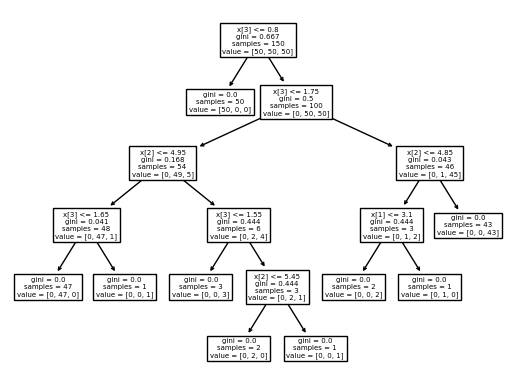

In [2]:
# Пример с iris 
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

In [3]:
def plot_tree_scores(depths):
    train_scores = []
    test_scores = []
    
    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure(figsize=(10, 6))
    plt.plot(depths, train_scores, color='blue', label='train score')
    plt.plot(depths, test_scores, color='green', label='test score')
    plt.legend()

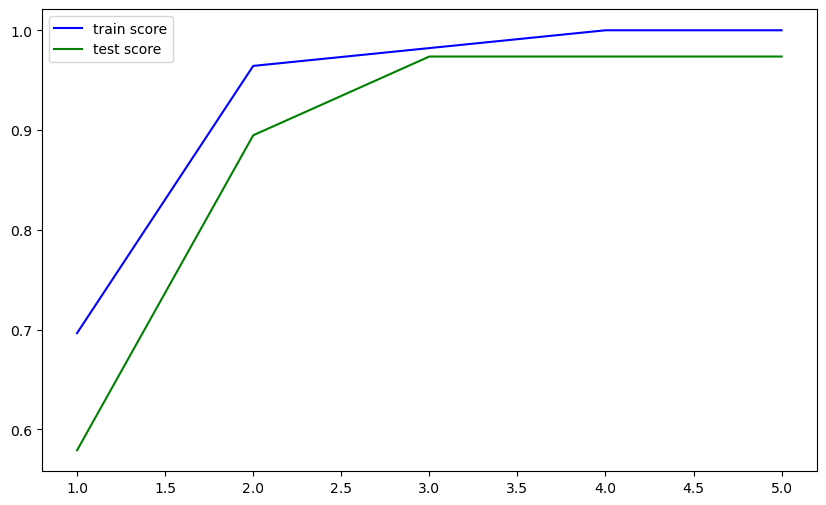

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
plot_tree_scores(range(1, 6))

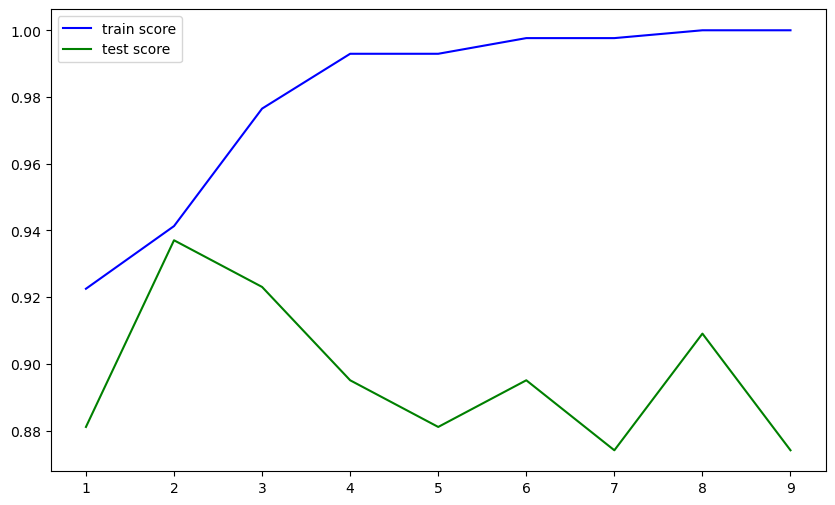

In [5]:
# За breast cancer 
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
plot_tree_scores(range(1, 10))

Сега ще разгледаме по-подробно какво се случва с помощта на едни синтетични данни за класификация.

In [6]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100,
                           n_features=2,
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           random_state=123)

In [7]:
print(x[:4])
print(y[:4])

[[-0.01032243 -0.80566819]
 [-1.10293659  2.21661117]
 [-1.90795358 -0.20839902]
 [ 0.53115524  2.2762704 ]]
[1 0 0 1]


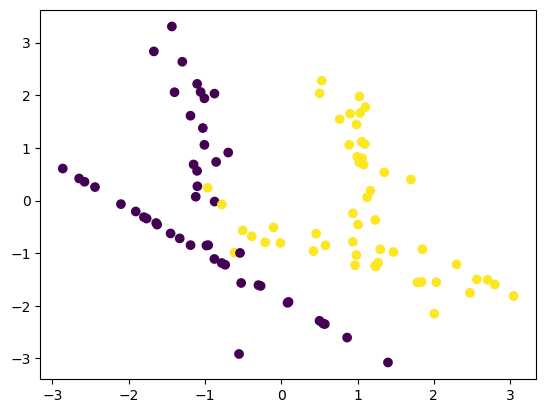

In [8]:
plt.scatter(x[:,0], x[:,1], c=y);

In [9]:
# Plotting decision regions adapted from 
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, ax = plt.subplots(figsize=(10, 8))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    
    plt.show()

In [10]:
clf = DecisionTreeClassifier().fit(x,y)
print(clf.score(x, y))

#Cross validation
scores = cross_val_score(clf, x, y, cv=5)
print(scores)
print(scores.mean())

1.0
[0.95 0.95 0.9  0.8  1.  ]
0.9199999999999999


### Как се учи алгоритъмът?

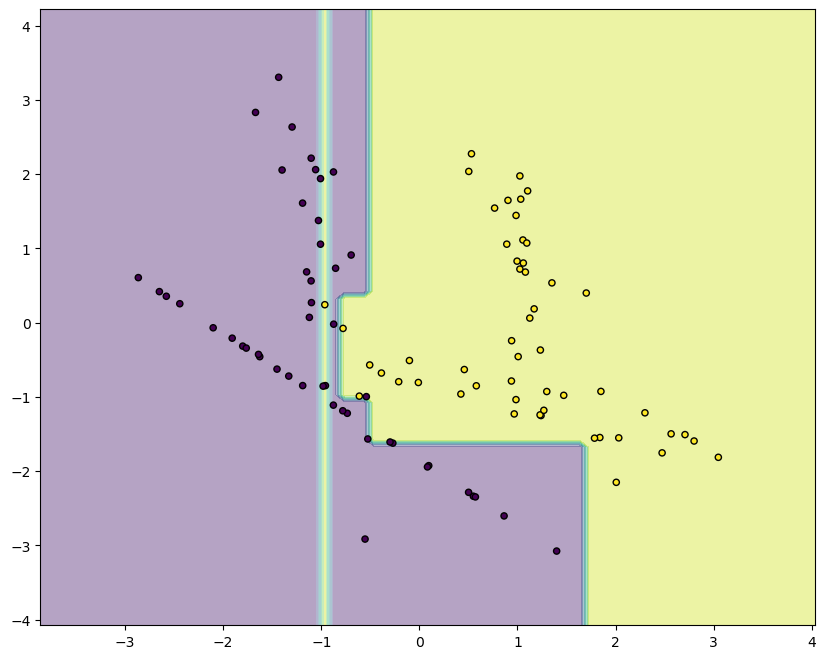

In [11]:
clf = DecisionTreeClassifier().fit(x, y)
plot_boundary(clf, x, y)

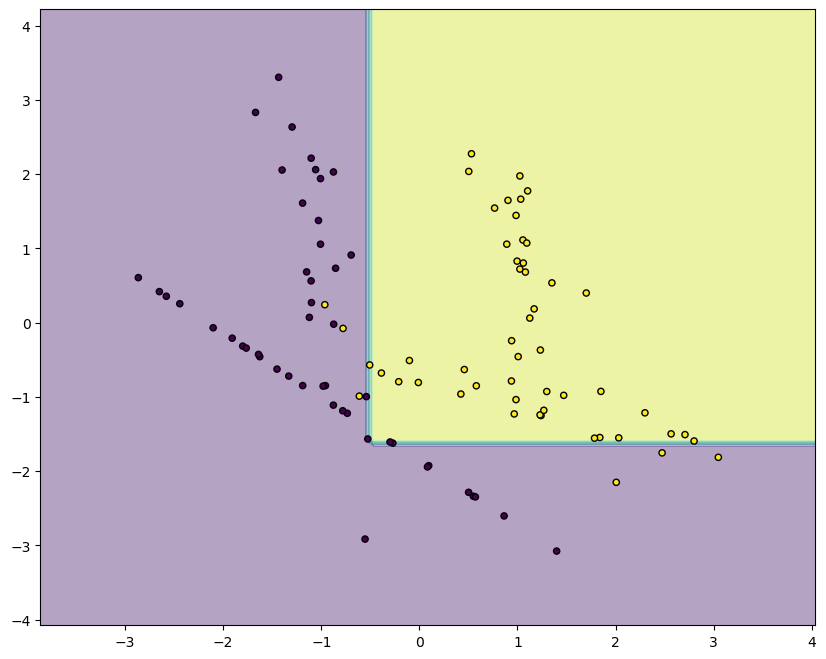

In [12]:
clf = DecisionTreeClassifier(min_samples_split=50).fit(x, y)
plot_boundary(clf, x, y)

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(0.2, 0.5, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.6, 0.5, 'x[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

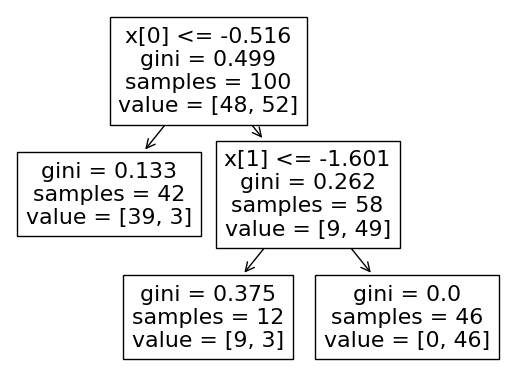

In [13]:
from sklearn import tree
tree.plot_tree(clf)

## Gini

$Gini(X_) = \sum_i p_{i} (1 - p_{i})$,     

където $p_{i}$ е вероятността един елемент да е от клас *i*.

### Пример:

['Лъчо', 'Лъчо', 'Стефан', Стефан']

Лъчо - 2, Стефан - 2

Пропорции:

Лъчо: $\frac{2}{4}$, Стефан: $\frac{2}{4}$

Стойност за Лъчо: 
$$\frac{2}{4} * (1 - \frac{2}{4})$$
$$0.5 * 0.5$$
$$0.25$$

Стефан има същата стойност $0.25$.

$$gini=0.25+0.25 = 0.5$$


### Пример 2:

['Круши', 'Круши', 'Круши']

Круши - 3

Пропорции:

Круши $\frac{3}{3} = 1$

$$1 * (1 - 1)$$
$$1 * 0$$
$$gini=0$$

In [14]:
def gini_impurity(subset_counts):
    subset_counts = np.array(subset_counts)
    subset_counts_normalized = subset_counts / subset_counts.sum()
    
    impurity = sum([subset_count * (1 - subset_count) 
                    for subset_count in subset_counts_normalized])
    
    print('Gini impurity for', subset_counts, " is:", impurity)
    return impurity

In [15]:
samples = [[2,0], [1,0], [9,1], [4,4]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0]  is: 0.0
Gini impurity for [1 0]  is: 0.0
Gini impurity for [9 1]  is: 0.18
Gini impurity for [4 4]  is: 0.5


In [16]:
samples = [[2,0,1], [6,0,0], [9,1,0], [5,5,0], [5,5,5]]

for sample in samples:
    gini_impurity(sample)

Gini impurity for [2 0 1]  is: 0.4444444444444445
Gini impurity for [6 0 0]  is: 0.0
Gini impurity for [9 1 0]  is: 0.18
Gini impurity for [5 5 0]  is: 0.5
Gini impurity for [5 5 5]  is: 0.6666666666666667


[Text(0.4, 0.8333333333333334, 'x[0] <= -0.516\ngini = 0.499\nsamples = 100\nvalue = [48, 52]'),
 Text(0.2, 0.5, 'gini = 0.133\nsamples = 42\nvalue = [39, 3]'),
 Text(0.6, 0.5, 'x[1] <= -1.601\ngini = 0.262\nsamples = 58\nvalue = [9, 49]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]')]

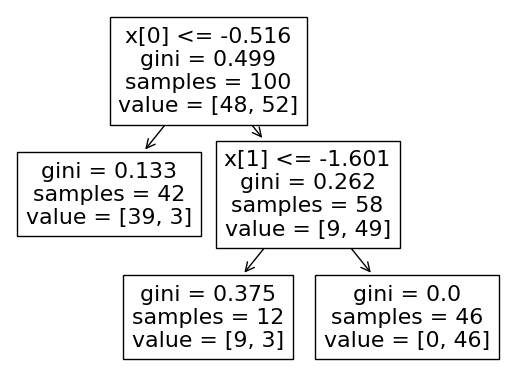

In [17]:
tree.plot_tree(clf)

In [18]:
gini_impurity([48,52])
gini_impurity([9, 49])
gini_impurity([39, 3])
gini_impurity([0, 46]);

Gini impurity for [48 52]  is: 0.4992
Gini impurity for [ 9 49]  is: 0.2621878715814506
Gini impurity for [39  3]  is: 0.13265306122448978
Gini impurity for [ 0 46]  is: 0.0


### Плюсове: 
* Дървото е лесно за интерпретация.
* Лесно се справя с ирелевантни атрибути (*gain =0*).
* Може да се справи с липсващи данни. (Не и за текущата имплементация в sklearn).
* Компактно представяне на модела.
* Бърз при предсказване: *O(дълбочината на дървото)*.
* Може да прави класификация с повече класове без допълнителни трикове.
* Лесен за използване и дава добри резултати с малко експерименти.

### Минуси:
* Разделя атрибутите само по осите. 
* Алчен (greedy) - може да не открие най-доброто дърво.
* Експоненциално нарастване на възможните дървета.
* Овърфитва силно.

## Въпроси по DT?

## Random Forest

- Пример за обучение чрез ансамбли (ensemble learning)
- Обучава множество от дървета (гора) на случайни подмножества от данните и осреднява резултатите

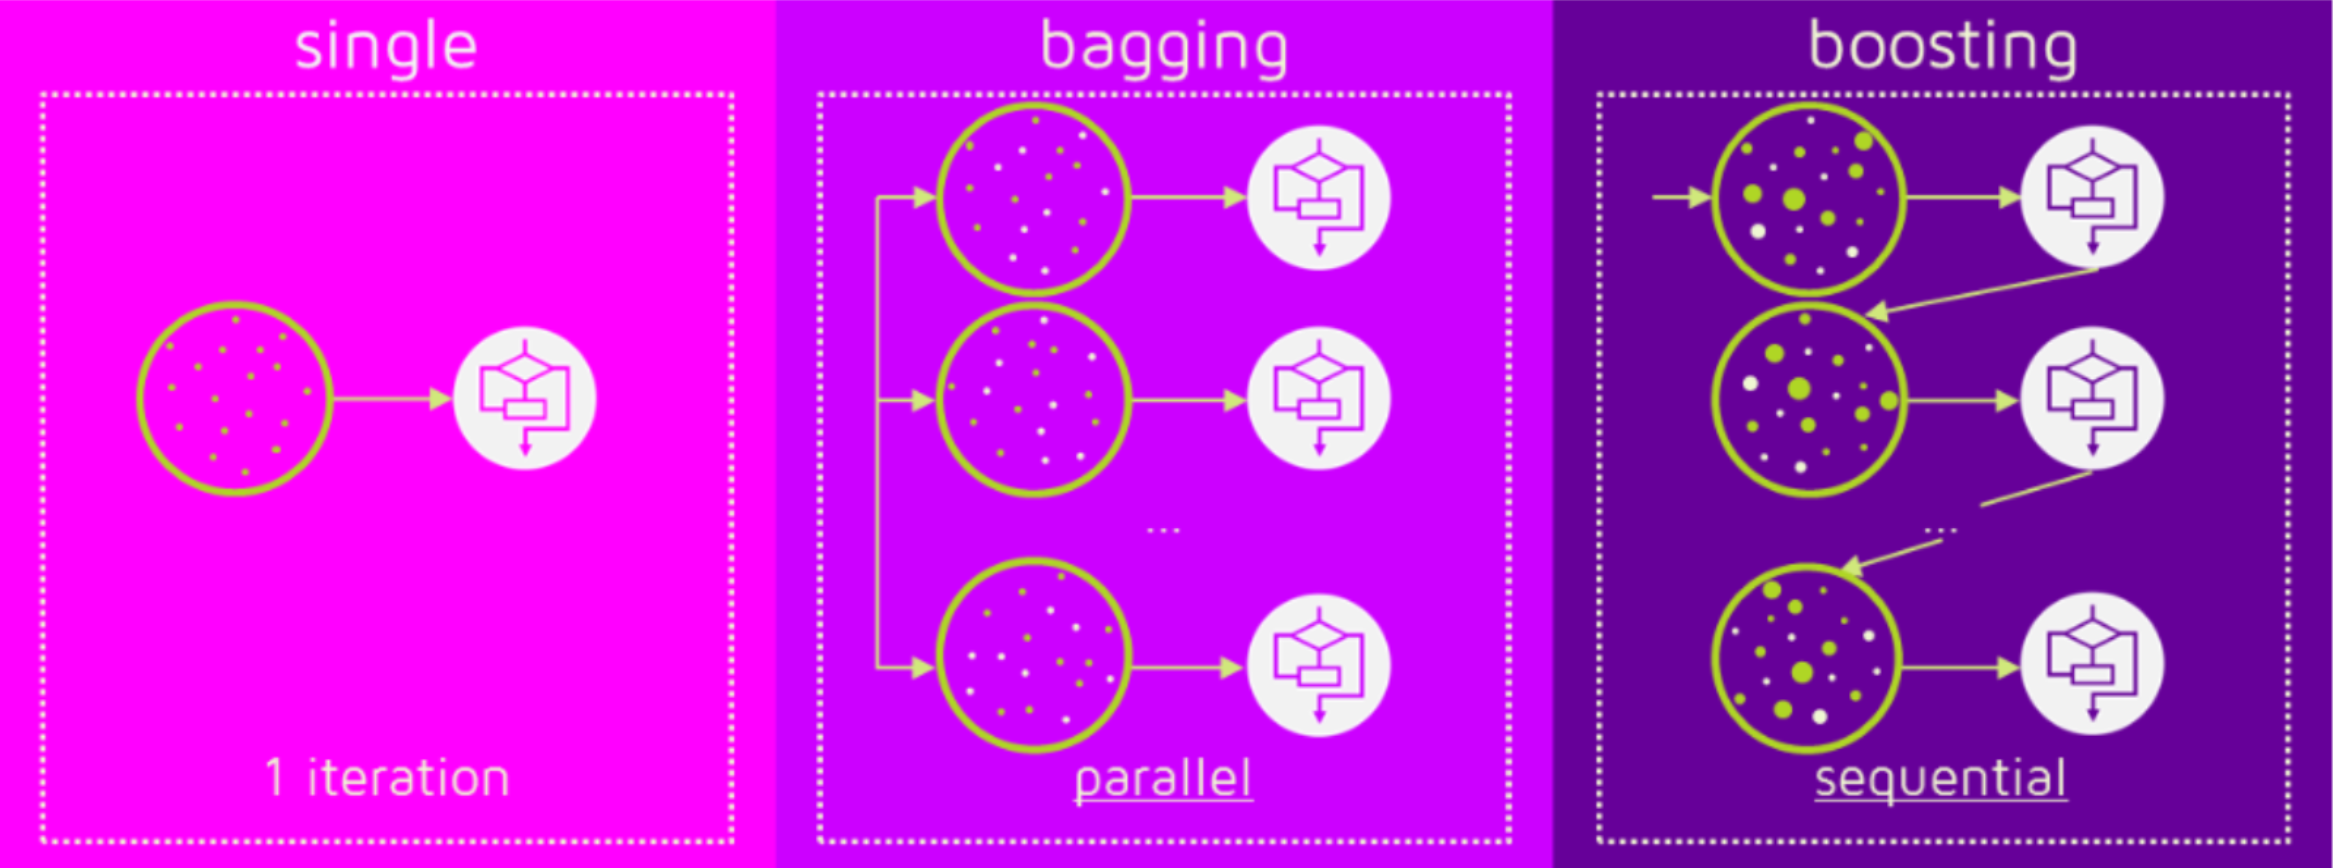

In [19]:
from sklearn.ensemble import RandomForestClassifier

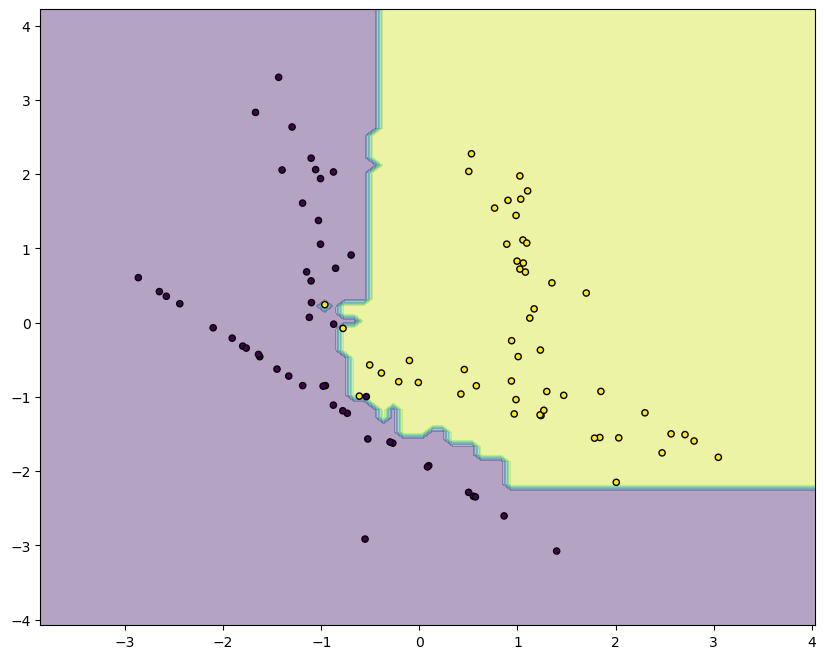

In [20]:
clf = RandomForestClassifier(random_state=23).fit(x,y) # без настройка на параметрите
plot_boundary(clf, x, y)

## Параметри за RF:

* `n_estimators`: брой дървета - 10, 100, 1000 
* `criterion`: за всички дървета  - gini, entropy
* `max_features`: Колко фичъра да се пробват при търсене на най-добро разделяне. По подразбиране - `sqrt(n_features)` - различни при всяко ново търсене.
* `max_depth`: Максимална дълбочина на дърветата
* `min_samples_split`: Минимален брой семпли за да може да се раздели възела
* `bootstrap` - Втори параметър за случайност - random sampling with replacement. Тегли същия брой семпли като оригиналния сет.
* `n_jobs` - Тренира по няколко дървета едновременно, но използва повече памет.
* `random_state` - възпроизведими експерименти

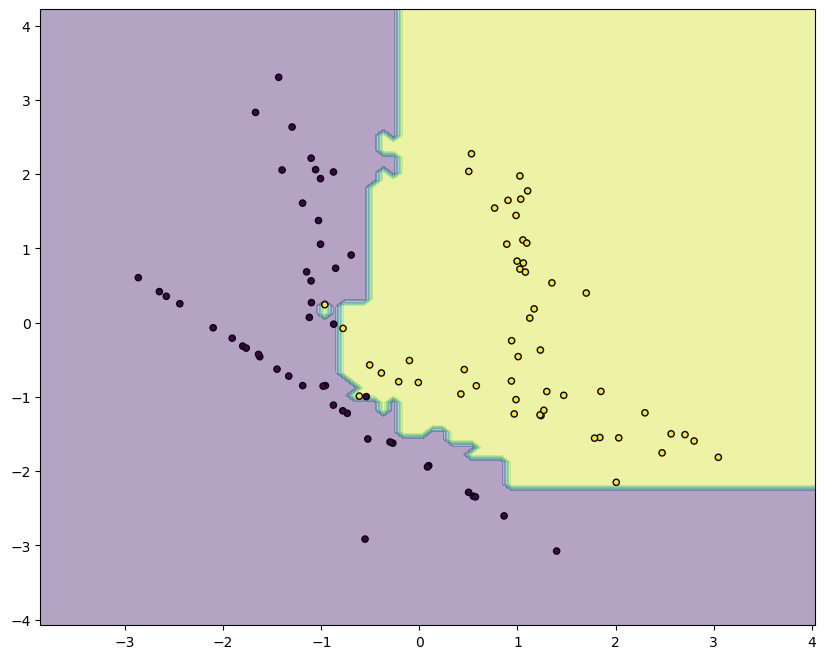

In [21]:
clf = RandomForestClassifier(random_state=100).fit(x,y)
plot_boundary(clf, x, y)

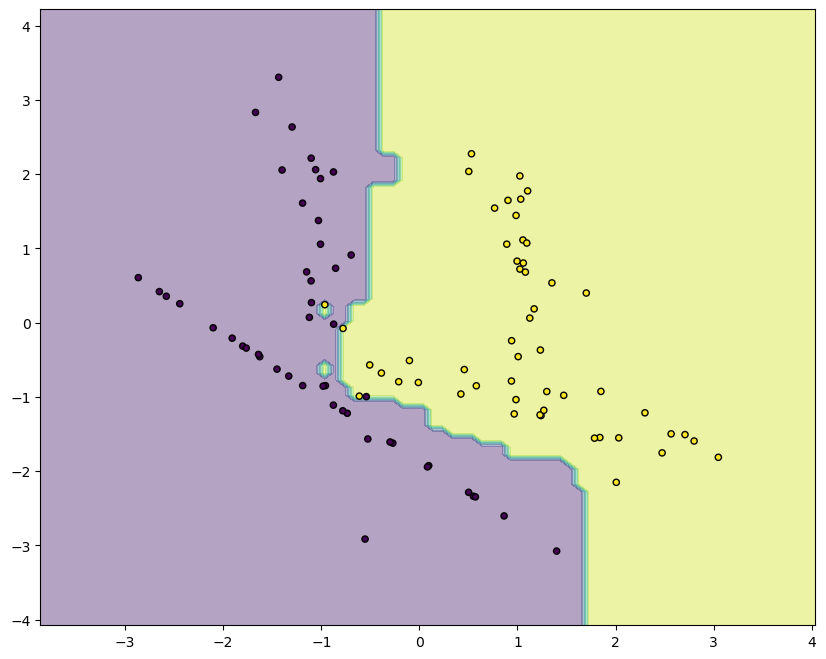

In [22]:
# Тъй като е случайно, можем да получим и различна граница 
clf = RandomForestClassifier(n_estimators=10).fit(x,y)
plot_boundary(clf, x, y)

### Значимост на характеристиките (feature importance) в RF - Сходно на теглата на параметрите при линейни модели.
![](http://scikit-learn.org/stable/_images/sphx_glr_plot_forest_importances_001.png)

http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## AdaBoost

Boosting algorithm

1. Тренираме слаб модел върху данните 

2. Повтаряме *n* пъти:

        Тренираме нов слаб модел като даваме повече тежест на данните, които
        предишния класифицира грешно

3. Резултат всички слаби модели

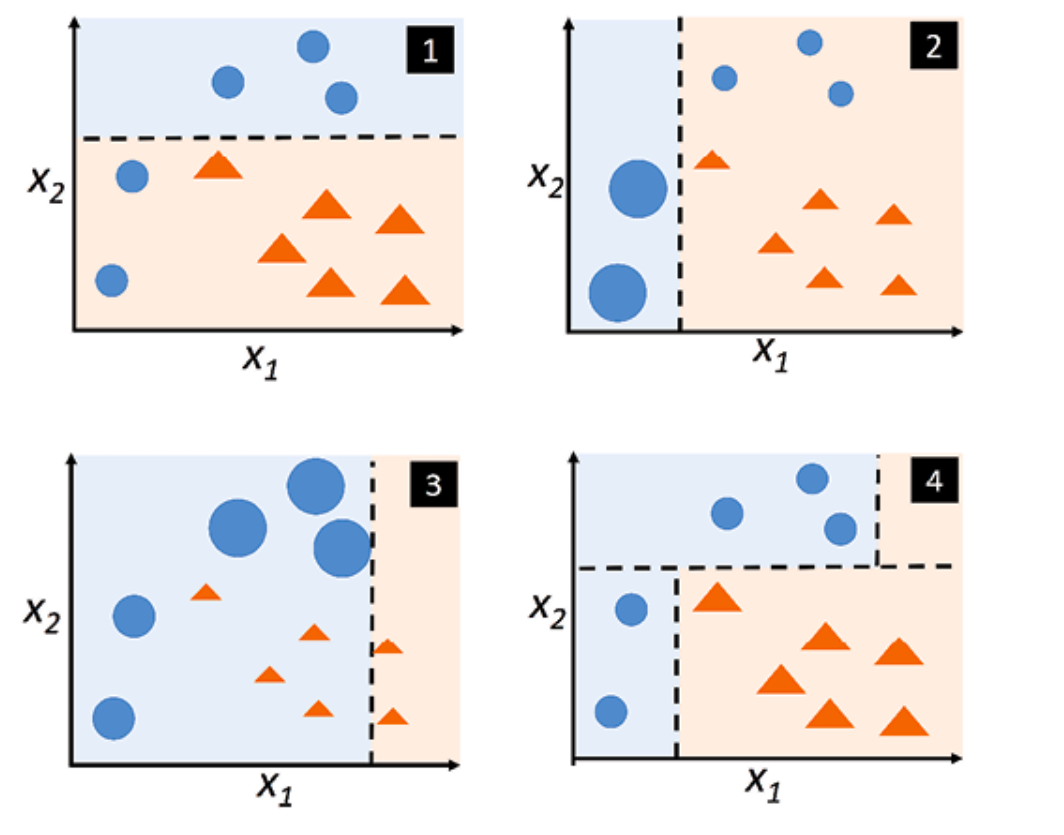

## XGBoost

1. Тренираме слаб модел върху данните

2. Повтаряме докато не стигнем критерий за терминиране:

        Тренираме нов слаб модел върху грешката на предишните

3. Резултат всички слаби модели

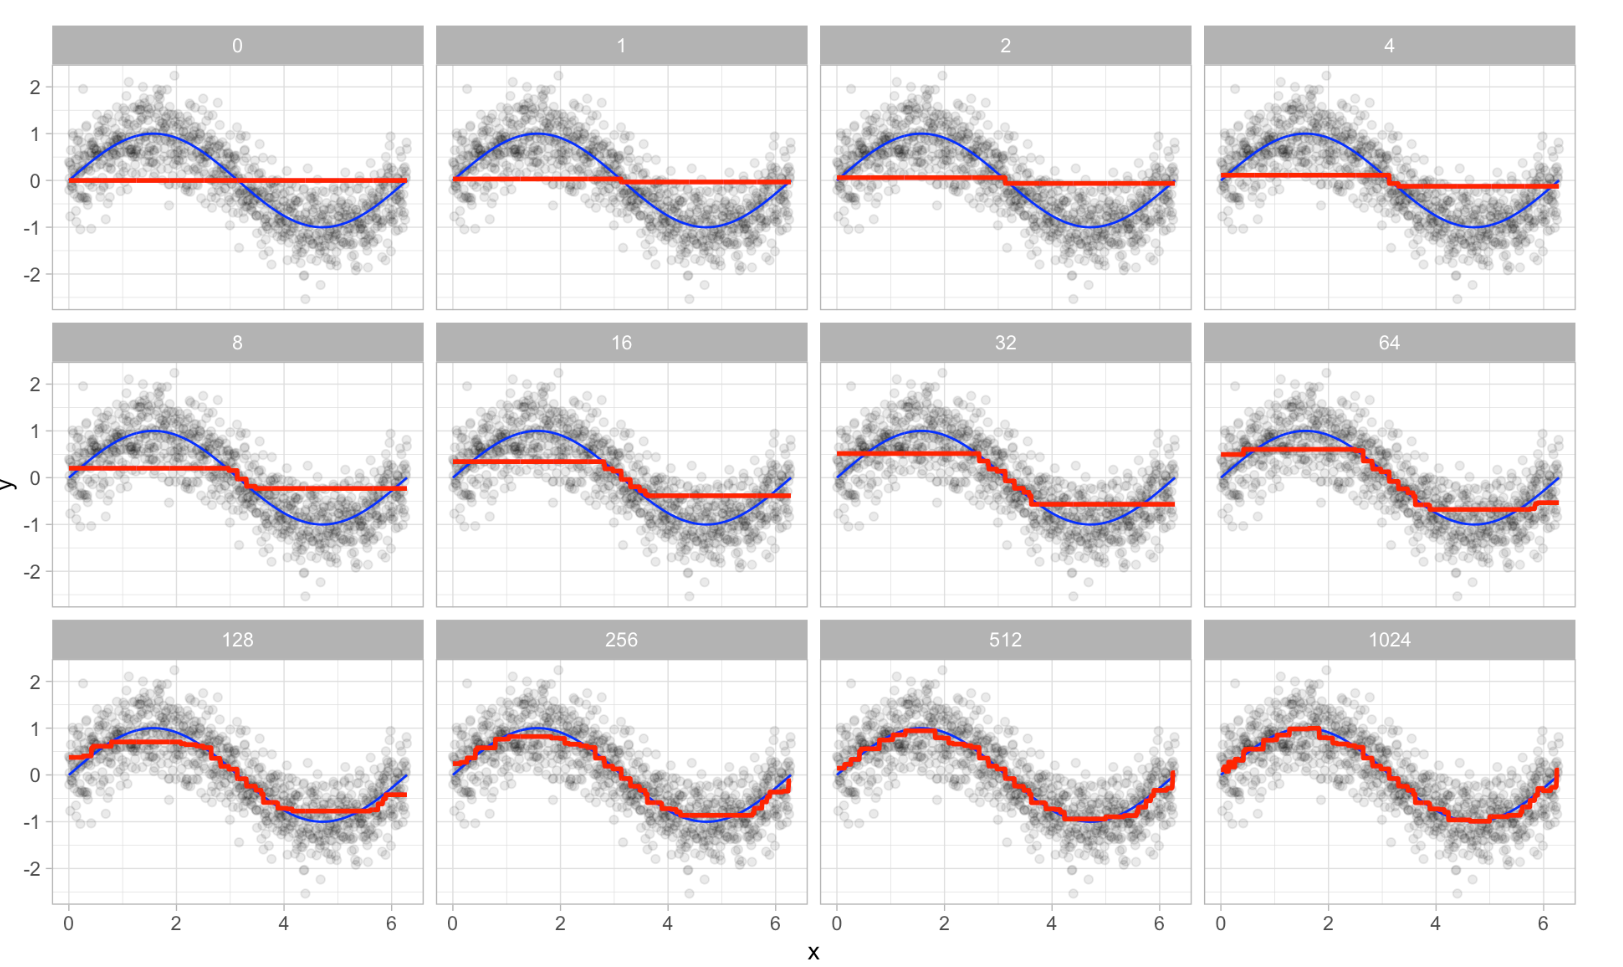